<a href="https://colab.research.google.com/github/joe-074/SPBU/blob/main/FCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
!pip install tensorflow numpy matplotlib

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

# Setting random seeds to get reproducible results
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(1)
from tensorflow.keras.datasets import mnist

In [133]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Size of the training set", len(x_train))
print("Size of the testing set", len(x_test))

Size of the training set 60000
Size of the testing set 10000


In [134]:
# we need to know the shape of each image
x_train.shape

(60000, 28, 28)

The label is 3


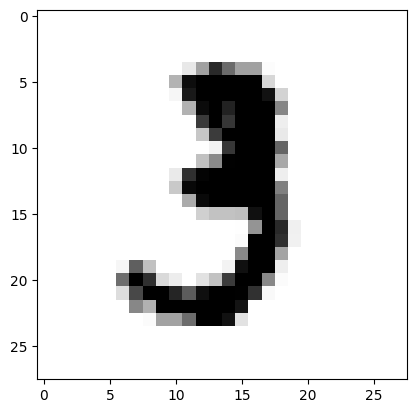

In [135]:
plt.imshow(x_train[10], cmap='Greys')
print("The label is", y_train[10])

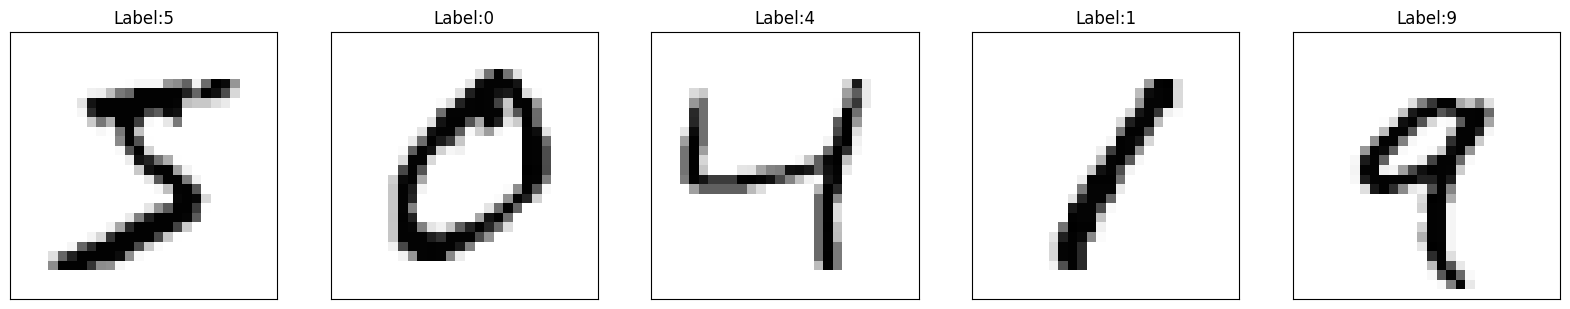

In [136]:
fig = plt.figure(figsize=(20,20))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='Greys')
    ax.set_title('Label:' + str(y_train[i]))

In [137]:
# Reshaping the features for the model input (adding channel dimension).
# The Flatten layer in the model will handle flattening to 1D.
# x_train_fcn_input = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test_fcn_input = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Pre-processing the Data¶
Neural networks work best when the input values are scaled between 0 and 1. The pixel values of the images range from 0 to 255, so we need to normalize them by dividing by 255 (Normalization).

In [138]:
# x_train = x_train / 255.0
# x_test  = x_test/ 255.0

# For best practice, would be explicit about dtype:
x_train = x_train.astype("float32") / 255.0             # Keras prefers float32 tensors; otherwise we’ll get float64, which is slower and unnecessary.
x_test  = x_test.astype("float32") / 255.0


In [139]:
# Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import Input

# Building the model
model = Sequential()
model.add(Input(shape=(28, 28,)))
model.add(Flatten()) #28x28 -> 784 Flatten the 28x28 image into a 1D vector of 784 features
model.add(Dense(128, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax')) #softmax act gives probability of each class

In [140]:
# Compiling the model with sparse_categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [141]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8137 - loss: 0.5899 - val_accuracy: 0.9688 - val_loss: 0.1076
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9464 - loss: 0.1806 - val_accuracy: 0.9727 - val_loss: 0.0942
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9580 - loss: 0.1382 - val_accuracy: 0.9803 - val_loss: 0.0780
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9667 - loss: 0.1127 - val_accuracy: 0.9795 - val_loss: 0.0771
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9701 - loss: 0.0970 - val_accuracy: 0.9793 - val_loss: 0.0763
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9735 - loss: 0.0866 - val_accuracy: 0.9780 - val_loss: 0.0757
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9755 - loss: 0.0773 - val_accuracy: 0.9800 - val_loss: 0.0694
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9782 - loss: 0.0722 -

In [142]:
predictions_vector = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [143]:
predictions = [np.argmax(pred) for pred in predictions_vector]

The label is 0
The prediction is 0


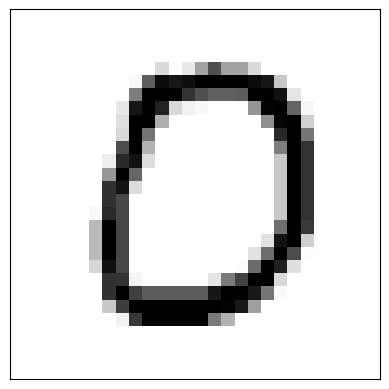

In [144]:
plt.imshow(x_test[10], cmap='Greys')
plt.xticks([])
plt.yticks([])
print("The label is", y_test[10])
print("The prediction is", predictions[10])

The label is 5
The prediction is 5


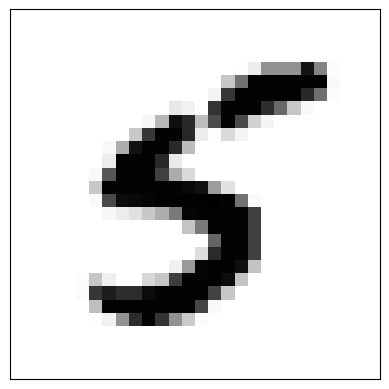

In [145]:
plt.imshow(x_test[155], cmap='Greys')
plt.xticks([])
plt.yticks([])
print("The label is", y_test[155])
print("The prediction is", predictions[155])

In [146]:
num_correct = 0
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        num_correct += 1

print("The model is correct", num_correct, "times out of", len(y_test))
print("The accuracy is", num_correct/len(y_test))

The model is correct 9778 times out of 10000
The accuracy is 0.9778
